

# Project: Hospital Appointment Visitation In Brazil

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>    
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from over 100k medical appointments in Brazil and is focused on the question of whether or not  patients show up for their appointment. A number of characteristics about the patient are included in each row. The columns include;
    <ol>
        <li>PatientId: Identification of a patient</li>
        <li>AppointmentID: Identification of each appointment(3) Gender: Male(M) or Female(F).</li>
        <li>Gender: Male(M) or Female(F).</li>
        <li>ScheduledDay: The day someone called or registered the appointment.</li>
        <li>AppointmentDay: The day of the actual appointment, when they have to visit the doctor</li>
        <li>Age: How old is the patient.</li>
        <li>Neighbourhood: Where the appointment takes place.</li> 
        <li>Scholarship: True(1) or False(0) . Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
        <li>Hipertension: True(1) or False(0).</li>
        <li>Diabetes: True(1) or False(0).</li>
        <li>Alcoholism: True(1) or False(0).</li>
        <li> Handcap: True(1) or False(0).</li>
        <li>SMS_received: whether patient received SMS or not. Received(1), Not Received(0).</li>
        <li>No-show: yes or no. yes, that is patient did not show up for the appointment while no indicated patient showed up.</li>
    </ol>
        Learn more about the Bolsa Família program on [Google](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).    
        Hypertension, diabetes, alcoholism, and handicap are medical conditions.

### Questions 
> **Main question**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

>**sub questions**\
    <ol>
        <li>What percentage of patients showed up?</li>
        <li>Age Distribution and Relationship with patients showing up for appointment</li>
        <li>Gender Distribution and Relationship with patients showing up for appointment</li>
        <li>How many patients had scheduled day and appointment day as same? How are they different from those who scheduled day(s) before, in term of showing up for the visit?</li>
        <li>How is SMS related to schedule and Appointment days</li>
        <li>Relationship between neighbourhoods and showing up for apponitment</li>
        <li>Relationship between schoolarship and showing up for apponitment</li>
        <li>Relationship between disease and showing up for apponitment</li>
        <li>Relationship between recieving sms and showing up for apponitment</li>
    </ol>    

In [173]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> This include;
    <ul>
        <li>Loading the data</li>
        <li>Assessing the data for cleanliness</li>
        <li>Data cleaning</li>
    </ul>
    
### Load Data

In [174]:
# Loading the data and printing out the first 3 lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Assessing The Data

In [175]:
#checking the column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [176]:
# checking the number of rows and columns
df.shape

(110527, 14)

In [177]:
#Checking for duplicated data
sum(df.duplicated())

0

In [178]:
# checking for null values
df.isnull().sum().any()

False

In [179]:
#checking for the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [180]:
# Checking for the number of unique value in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [181]:
# checking for the unique value in Handicap because it was meant to be 2 and not 5
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [182]:
# Checking the counts of 2,3,4 to know if the columns is redemable
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [183]:
# summary statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Observations**: The patient and appointment identification numbers are not required in answering the research questions. The column names; 'Hypertension' and 'Handicap' were wrongly spelt. 'Scholarship','SMS_received' and 'No-show' are inappropriate names for the respective columns. There are 110527 rows and 14 columns in this dataset, and there are no duplicated or missing values.  The scheduled and appointment days are in string format instead of datetime. The Handicap column has 5 unique values instead of 2 (i.e True(1) or False(0) ), as specified at  [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). The minimum age is -1 and this is impossible. Both mean and median age are about 37years.

### Data Cleaning 

In [184]:
#Firstly, dropping columns for reasons specified in the observations above
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [185]:
#secondly, remaning columns
df = df.rename(columns={'Scholarship': 'BolsaFamília',
                        'Hipertension': 'Hypertension',
                        'Handcap': 'Handicap',
                        'SMS_received': 'SMS',
                        'No-show': 'Appointment'})

#confirm changes 
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'BolsaFamília', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS', 'Appointment'],
      dtype='object')

In [186]:
df = df.query('Handicap == 0 or Handicap == 1')
df['Handicap'].unique()

array([0, 1], dtype=int64)

In [188]:
# changing the 0 and 1 in the disease columns
df['Hypertension'] = df['Hypertension'].replace([0,1],['Not HTN', 'HTN'])
df['Diabetes'] = df['Diabetes'].replace([0,1],['Not DM', 'DM'])
df['Alcoholism'] = df['Alcoholism'].replace([0,1],['Not Alcoholic', 'Alcoholic'])
df['Handicap'] = df['Handicap'].replace([0,1],['Not Handicapped', 'Handicapped'])

# change other 0 and 1
df['BolsaFamília'] = df['BolsaFamília'].replace([0,1],['Not Enrolled', 'Enrolled'])
df['SMS'] = df['SMS'].replace([0,1],['Not Received', 'Received'])

# change the 'No' and Yes to 'Visited' and 'Absconded' in the Appointment column
df['Appointment'] = df['Appointment'].replace(['No', 'Yes'],['Visited','Absconded'])

#confirm changes
df['Appointment'].unique()

array(['Visited', 'Absconded'], dtype=object)

> **Reasons**: The disease condition columns(Hypertesion, Diabetes, Alcoholism and Handicap) would have be added together to form a new column. This new column would have revealed patients with more than one medical conditions, and it would have been used to compare those who showed up and those who did not, based on the number of medical conditions. However, Handicap has been deleted, the remaing columns cannot be added because some patients who were only Handicapped will have zero disease condition in the new column, and those with other disease and were also handicapped would not be well represented in the new column. Since the integer format is no longer valuable and string will be easier to deal with, its better to convert. HTN and DM are abbreviations for Hypertion and Diabetic Mellitus respectively. Visited and Absconded sound more appropriate than the No and Yes in represiting those who showed up and did not, on the appointment day.

In [82]:
#Use the function lambda to avoid repeatitiveness
# Remove the time part of the datetime first, not required for this analysis
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].apply(lambda x: x.str.slice(stop=10))

#coverting from string to date
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].astype('datetime64[ns]')

#confirm changes
df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
dtype: object

In [83]:
# Replace the -1 with the mean age
MeanAge = df.Age.mean()
df['Age'] = df['Age'].replace({-1: MeanAge})

#confirm changes
df['Age'].describe()

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [84]:
# Checking out how the table looks
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,BolsaFamília,Hypertension,Diabetes,Alcoholism,SMS,Appointment
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,Not Enrolled,HTN,Not DM,Not Alcoholic,Not Received,Visited
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,Not Enrolled,Not HTN,Not DM,Not Alcoholic,Not Received,Visited


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What percentage of patients showed up?

In [189]:
#percentage that showed up
PerShow = df['Appointment'].value_counts()/df['Appointment'].count()*100
PerShow.round(1)

Visited      79.8
Absconded    20.2
Name: Appointment, dtype: float64

> About 80% of the patients showed up for the appointment.

 ### Question 2: Age Distribution and Relationship with patients showing up for appointment

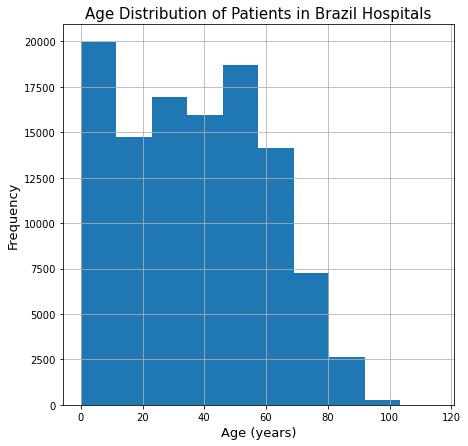

In [86]:
# Histogram of age distribution only, because it is the only continuous variable in the dataset
df.Age.hist(figsize=(7,7))

#chart labels
plt.xlabel('Age (years)', fontsize=13);
plt.ylabel('Frequency', fontsize=13)
plt.title('Age Distribution of Patients in Brazil Hospitals', fontsize=15);

In [87]:
# create a new column, age group, by converting the age into categories 
# let classwidth be 20, just as it is in the histogram above
Agebin = [0,20,40,60,80,100,120]
AgeLabels = ['0-20','21-40','41-60','61-80','81-100','101-120']
df['AgeGroup'] = pd.cut(df['Age'], bins=Agebin, labels=AgeLabels)

# Then, Count the number of scheduled appointment that was honoured 
# and those that were not honoured by the patients, based on the age group
AgegrpCounts = df.groupby(['AgeGroup', 'Appointment'])['Age'].count()
AgegrpCounts.unstack()

Appointment,Absconded,Visited
AgeGroup,,
0-20,6457,21852
21-40,6626,22210
41-60,5591,24490
61-80,2537,14373
81-100,466,2379
101-120,3,4


In [88]:
# calculate the percentage of scheduled appointment that was honoured 
# and also those that were not honoured by the patients based on the age group
AgegrpPer = AgegrpCounts/df.groupby(['AgeGroup'])['Age'].count()*100
AgegrpPer.unstack().round(1)

Appointment,Absconded,Visited
AgeGroup,,
0-20,22.8,77.2
21-40,23.0,77.0
41-60,18.6,81.4
61-80,15.0,85.0
81-100,16.4,83.6
101-120,42.9,57.1


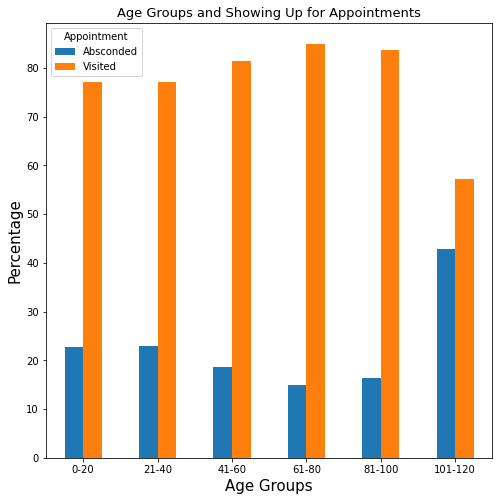

In [89]:
# plot a double bar chart showing compliance to appointment by age group
AgegrpPer.unstack().plot(kind='bar', figsize=(8,8));

# chart labels
plt.xlabel('Age Groups', fontsize=15);
plt.ylabel('Percentage', fontsize=15)
plt.title('Age Groups and Showing Up for Appointments', fontsize=13);
location = [0,1,2,3,4,5]
labels = ['0-20','21-40','41-60','61-80','81-100','101-120']
plt.xticks(location, labels, rotation=0);

>**Age Report** The positively skewed histogram showed that, age 0 to 10 has the highest number of patients followed by 50 to 60, while age group 100 to 120 has the lowest. The tables above, showed the number and the percentage of scheduled appointments that was honoured and those that were not honoured by the patients, based on their age groups. Over 75% of the patients in each of the age groups visited the doctor on their appoitment days except for those older than 100 years, where only about 57% of the patients showed up in the hospitals. The to total number of patients between 100-120 years are just 7, this may be too small to make comparism with other age groups.

### Question 3: Gender Distribution and Relationship with patients showing up for appointment

In [90]:
# Determine the percentage of the patients by gender
GenderPer = df['Gender'].value_counts()/df['Gender'].count()*100
GenderPer.round(1)

F    65.0
M    35.0
Name: Gender, dtype: float64

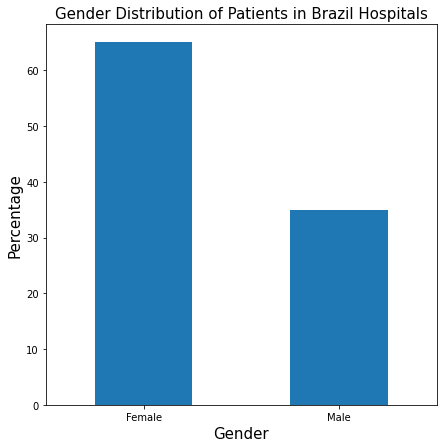

In [91]:
# plot a simple bar chart for the gender distibution
GenderPer.plot(kind='bar', figsize=(7,7));

# chart labels
plt.xlabel('Gender', fontsize=15);
plt.ylabel('Percentage', fontsize=15)
plt.title('Gender Distribution of Patients in Brazil Hospitals', fontsize=15);
location = [0,1]
labels = ['Female', 'Male']
plt.xticks(location, labels, rotation=0);

In [190]:
# calculate the percentage of patients who showed up and absconded based on gender
PerByGender = df.groupby(['Gender', 'Appointment'])['Age'].count()/df.groupby(['Gender'])['Age'].count()*100
PerByGender.unstack().round(1)

Appointment,Absconded,Visited
Gender,,
F,20.3,79.7
M,20.0,80.0


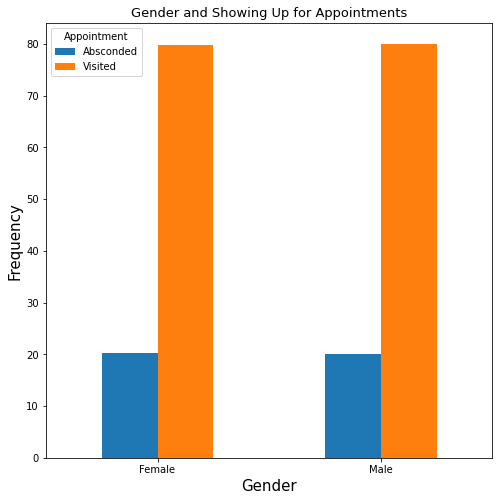

In [93]:
# plot a double bar chart showing those who showed up and absconded based on gender
PerByGender.unstack().plot(kind='bar', figsize=(8,8));

# chart labels
plt.xlabel('Gender', fontsize=15);
plt.ylabel('Frequency', fontsize=15)
plt.title('Gender and Showing Up for Appointments', fontsize=13);
location = [0,1]
labels = ['Female', 'Male']
plt.xticks(location, labels, rotation=0)

plt.show()

>**Gender Result**: About sixty-five percent of all the patients were females as shown in the table and the simple bar chart above, however about 80% of each gender group showed up for their appointments as shown in the crosstable and double bar chart above. 

### Question 4. How many patients had their scheduled day and appointment day as same? How are they different from those whose scheduled day was before the appoinment day, in term of showing up for the appointment?

In [94]:
# create a new column that match the schedule day to the appointment day
df['Days'] = np.where(df['ScheduledDay'] == df['AppointmentDay'],'Same Day', 'Not Same Day')

# calculate the percentage of days where schedule day and appointment day were the same
EqualDays = df['Days'].value_counts()/df['Days'].count()*100
EqualDays.round(1)

Not Same Day    65.1
Same Day        34.9
Name: Days, dtype: float64

In [95]:
# calculate the percentage for showing for appointment by days
DayCounts = df.groupby(['Days', 'Appointment'])['Age'].count()
AllDay = df.groupby(['Days'])['Age'].count()
DaysPer = DayCounts/AllDay*100

#confirm calculation
DaysPer.unstack().round(1)

Appointment,Absconded,Visited
Days,,
Not Same Day,28.5,71.5
Same Day,4.6,95.4


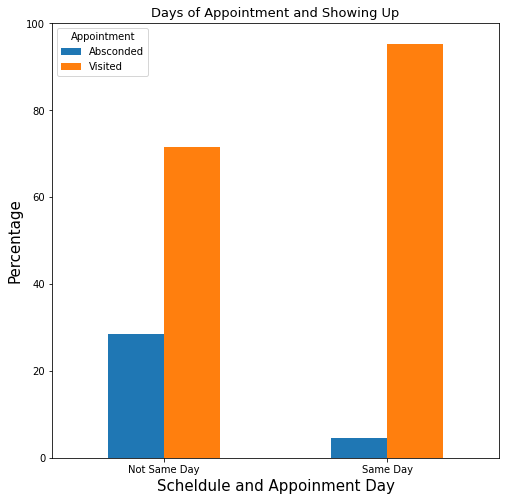

In [96]:
# bar chart of days of appointment and showing up
DaysPer.unstack().plot(kind='bar', figsize=(8,8));

#chart labels
plt.xlabel('Scheldule and Appoinment Day', fontsize=15);
plt.ylabel('Percentage', fontsize=15)
plt.title('Days of Appointment and Showing Up', fontsize=13);
location = [0,1]
labels = ['Not Same Day', 'Same Day']
plt.xticks(location, labels, rotation=0)

plt.show();

> **Days Result**: Only about 34.9% of the appointment day was same day as the schedule day, however over 95% of such appointments were honoured as compared to 71.5% among those appointments scheduled day(s) before the visitation.

### Question 5: How is SMS related to schedule and  Appointment days

In [97]:
# what Percentage of patients whose schedule and appointment days are different, received SMS?
PerSMSDays = df.groupby(['Days', 'SMS'])['Age'].count()/df.groupby(['Days'])['Age'].count()*100
PerSMSDays.round(1)

Days          SMS         
Not Same Day  Not Received     50.7
              Received         49.3
Same Day      Not Received    100.0
Name: Age, dtype: float64

> Only 49.3% of patients who schedule their appointments day(s) before the appointment day received SMS and none of those who schedule their appointments on the appointment day received SMS.

### Question 6: Relationship between neighbourhoods and showing up for apponitment?

In [98]:
# count of numbers of patients that showed up and did not, by the location of the hospitals.
# Swap the axes and dispaly all the columns to make it easier for readers
pd.set_option('display.max_columns', None)
HospLocCounts = df.groupby(['Neighbourhood', 'Appointment'])['Age'].count()
HospLocCounts.unstack().swapaxes('index','columns')

Neighbourhood,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,CENTRO,COMDUSA,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DE LOURDES,DO CABRAL,DO MOSCOSO,DO QUADRO,ENSEADA DO SUÁ,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,FRADINHOS,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,HORTO,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO BOI,ILHA DO FRADE,ILHA DO PRÍNCIPE,ILHAS OCEÂNICAS DE TRINDADE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,MORADA DE CAMBURI,MÁRIO CYPRESTE,NAZARETH,NOVA PALESTINA,PARQUE INDUSTRIAL,PARQUE MOSCOSO,PIEDADE,PONTAL DE CAMBURI,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CECÍLIA,SANTA CLARA,SANTA HELENA,SANTA LUÍZA,SANTA LÚCIA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
Appointment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Absconded,1.0,521.0,50.0,62.0,91.0,384.0,193.0,58.0,550.0,591.0,703.0,56.0,160.0,237.0,304.0,429.0,47.0,88.0,92.0,140.0,52.0,106.0,149.0,346.0,48.0,137.0,217.0,456.0,42.0,235.0,361.0,3.0,2.0,532.0,2.0,202.0,923.0,451.0,1465.0,631.0,696.0,258.0,133.0,1219.0,424.0,110.0,166.0,16.0,54.0,29.0,402.0,NaN,179.0,88.0,12.0,190.0,294.0,275.0,143.0,906.0,474.0,123.0,134.0,37.0,77.0,86.0,496.0,272.0,508.0,484.0,369.0,112.0,28.0,69.0,287.0,363.0,428.0,515.0,573.0,32.0,141.0
Visited,7.0,1741.0,221.0,220.0,332.0,1523.0,665.0,254.0,2223.0,1974.0,2631.0,254.0,689.0,1139.0,1094.0,1788.0,258.0,472.0,321.0,709.0,183.0,432.0,533.0,1543.0,210.0,563.0,854.0,1562.0,133.0,836.0,1524.0,32.0,8.0,1734.0,NaN,855.0,2591.0,2058.0,6252.0,3246.0,2157.0,1169.0,561.0,4586.0,1478.0,534.0,658.0,80.0,317.0,106.0,1862.0,1.0,623.0,364.0,57.0,845.0,994.0,1278.0,692.0,3525.0,1741.0,325.0,372.0,141.0,351.0,352.0,2635.0,1060.0,2063.0,2262.0,907.0,435.0,117.0,400.0,1152.0,1473.0,1549.0,1933.0,2559.0,120.0,710.0


In [99]:
# calculate the percentage of patients that showed up and did not, by the location of the hospitals 
AllLocations = df.groupby(['Neighbourhood'])['Age'].count()
LocPer = HospLocCounts/AllLocations*100
LocPer.unstack().round(1).swapaxes('index','columns')

Neighbourhood,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,CENTRO,COMDUSA,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DE LOURDES,DO CABRAL,DO MOSCOSO,DO QUADRO,ENSEADA DO SUÁ,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,FRADINHOS,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,HORTO,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO BOI,ILHA DO FRADE,ILHA DO PRÍNCIPE,ILHAS OCEÂNICAS DE TRINDADE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,MORADA DE CAMBURI,MÁRIO CYPRESTE,NAZARETH,NOVA PALESTINA,PARQUE INDUSTRIAL,PARQUE MOSCOSO,PIEDADE,PONTAL DE CAMBURI,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CECÍLIA,SANTA CLARA,SANTA HELENA,SANTA LUÍZA,SANTA LÚCIA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
Appointment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Absconded,12.5,23.0,18.5,22.0,21.5,20.1,22.5,18.6,19.8,23.0,21.1,18.1,18.8,17.2,21.7,19.4,15.4,15.7,22.3,16.5,22.1,19.7,21.8,18.3,18.6,19.6,20.3,22.6,24.0,21.9,19.2,8.6,20.0,23.5,100.0,19.1,26.3,18.0,19.0,16.3,24.4,18.1,19.2,21.0,22.3,17.1,20.1,16.7,14.6,21.5,17.8,NaN,22.3,19.5,17.4,18.4,22.8,17.7,17.1,20.4,21.4,27.5,26.5,20.8,18.0,19.6,15.8,20.4,19.8,17.6,28.9,20.5,19.3,14.7,19.9,19.8,21.6,21.0,18.3,21.1,16.6
Visited,87.5,77.0,81.5,78.0,78.5,79.9,77.5,81.4,80.2,77.0,78.9,81.9,81.2,82.8,78.3,80.6,84.6,84.3,77.7,83.5,77.9,80.3,78.2,81.7,81.4,80.4,79.7,77.4,76.0,78.1,80.8,91.4,80.0,76.5,NaN,80.9,73.7,82.0,81.0,83.7,75.6,81.9,80.8,79.0,77.7,82.9,79.9,83.3,85.4,78.5,82.2,100.0,77.7,80.5,82.6,81.6,77.2,82.3,82.9,79.6,78.6,72.5,73.5,79.2,82.0,80.4,84.2,79.6,80.2,82.4,71.1,79.5,80.7,85.3,80.1,80.2,78.4,79.0,81.7,78.9,83.4


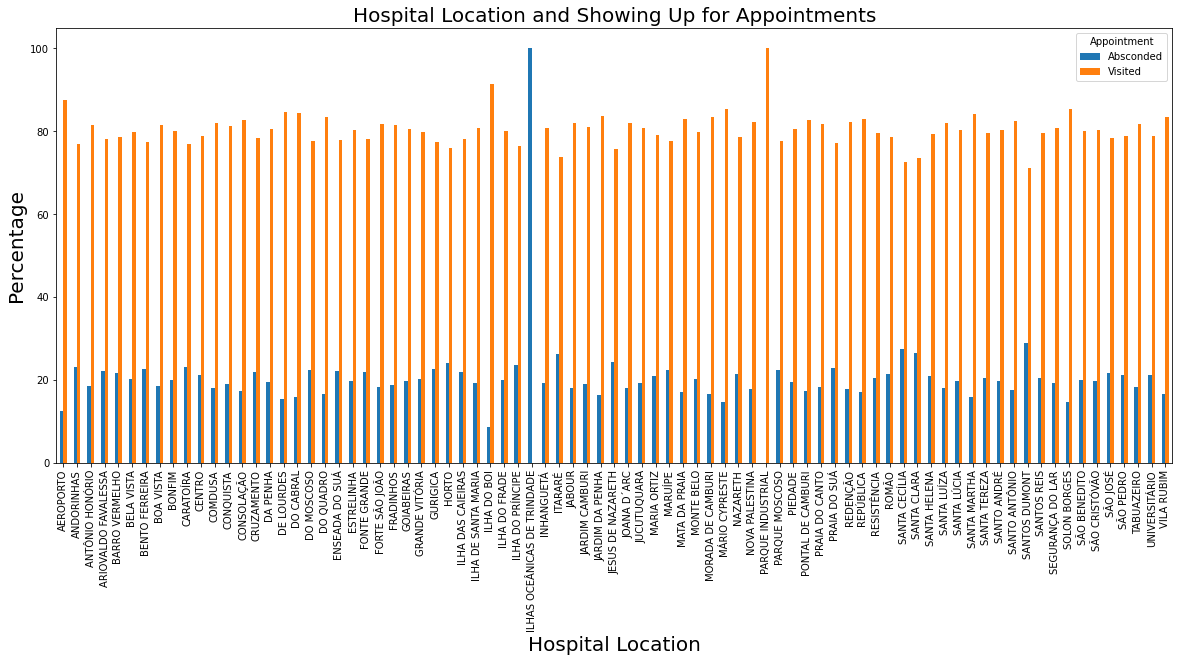

In [100]:
# plot a double bar chart showing those who showed up and absconded based on Hospital Location
LocPer.unstack().plot(kind='bar', figsize=(20,8));

# chart labels
plt.xlabel('Hospital Location', fontsize=20);
plt.ylabel('Percentage', fontsize=20)
plt.title('Hospital Location and Showing Up for Appointments', fontsize=20);

plt.show();

> **Location result:** Only 2 patients schedule appointment with the hospital located at ILHAS OCEÂNICAS DE TRINDADE, and both (100%) did not show up, while at PARQUE INDUSTRIAL the only patient that scheduled an appointment showed up. At every other hospital over 70% of their patients showed up.

### Question 7: Relationship between Bolsa Família program and showing up for apponitment?

In [101]:
#Determine the percentage of patients enrolled on the social wefare program
PerEnrolled = df['BolsaFamília'].value_counts()/df['BolsaFamília'].count()*100
PerEnrolled.round(1)

Not Enrolled    90.2
Enrolled         9.8
Name: BolsaFamília, dtype: float64

In [102]:
# count of numbers of patients that showed up and did not, by the Bolsa Família program.
BFCounts = df.groupby(['BolsaFamília', 'Appointment'])['Age'].count()
BFCounts.unstack()

Appointment,Absconded,Visited
BolsaFamília,,
Enrolled,2578,8283
Not Enrolled,19741,79925


In [103]:
# calculate the percentage of patients that showed up and did not, by the Bolsa Família program
AllBF = df.groupby(['BolsaFamília'])['Age'].count()
BFPercent = BFCounts/AllBF*100
BFPercent.unstack().round(1)

Appointment,Absconded,Visited
BolsaFamília,,
Enrolled,23.7,76.3
Not Enrolled,19.8,80.2


> **Bolsa Família Report:** Over 90% of all the patients did not enroll on the Bolsa Família program and among 9.8% that enrolled, only about 76.3% showed up for their appointments as compared to over 80% show up among those not enrolled.

### Question 8: Relationship between disease and showing up for apponitment

In [104]:
# Percentage of patients with hypertension
PerHTN = df['Hypertension'].value_counts()/df['Hypertension'].count()*100
PerHTN.round(1)

Not HTN    80.3
HTN        19.7
Name: Hypertension, dtype: float64

In [105]:
# Percentage of hypetensive patients that showed up for their appointment
PerHTNPts = df.groupby(['Hypertension', 'Appointment'])['Age'].count()/df.groupby(['Hypertension'])['Age'].count()*100

# slice out only patients with hypertension 
HTNPts = PerHTNPts[0:2]
HTNPts.round(1)

Hypertension  Appointment
HTN           Absconded      17.3
              Visited        82.7
Name: Age, dtype: float64

In [106]:
# Percentage of patients with Diabetes
PerDM = df['Diabetes'].value_counts()/df['Diabetes'].count()*100
PerDM.round(1)

Not DM    92.8
DM         7.2
Name: Diabetes, dtype: float64

In [107]:
# Percentage of diabetes patients that showed up for their appointment
PerDMPts = df.groupby(['Diabetes', 'Appointment'])['Age'].count()/df.groupby(['Diabetes'])['Age'].count()*100

# slice out only patients with diabetes 
DMPts = PerDMPts[0:2]
DMPts.round(1)

Diabetes  Appointment
DM        Absconded      18.0
          Visited        82.0
Name: Age, dtype: float64

In [108]:
# Percentage of alcoholics
PerAlcoholics = df['Alcoholism'].value_counts()/df['Alcoholism'].count()*100
PerAlcoholics.round(1)

Not Alcoholic    97.0
Alcoholic         3.0
Name: Alcoholism, dtype: float64

In [109]:
# Percentage of alcoholics that showed up for their appointment
PerAlcoholicPts = df.groupby(['Alcoholism', 'Appointment'])['Age'].count()/df.groupby(['Alcoholism'])['Age'].count()*100

# slice out only alcoholics
AlcoholicPts = PerAlcoholicPts[0:2]
AlcoholicPts.round(1)

Alcoholism  Appointment
Alcoholic   Absconded      20.1
            Visited        79.9
Name: Age, dtype: float64

#### Create a single table showing all the medical conditions

In [110]:
# Make the index of all the medical conditions same
HTNPts.index.rename(['Medical Conditions', 'Appointment'], inplace=True)
DMPts.index.rename(['Medical Conditions', 'Appointment'], inplace=True)
AlcoholicPts.index.rename(['Medical Conditions', 'Appointment'], inplace=True)

# Merge all the conditions
AllDx = HTNPts.append(DMPts).append(AlcoholicPts).round(1)
AllDx.unstack()

Appointment,Absconded,Visited
Medical Conditions,,
Alcoholic,20.1,79.9
DM,18.0,82.0
HTN,17.3,82.7


> **Medical conditions report:** The percentage of patients who were hypertensive, diabeteics and alcoholics were 19.7%, 7.2% and 3% respectively. Over 79% of patients with any of these conditions showed up for their appointments.

### Question 9: Relationship between recieving sms and showing up for apponitment

In [111]:
# Percentage of all patients that received SMS
PerSMS = df['SMS'].value_counts()/df['SMS'].count()*100
PerSMS.round(1)

Not Received    67.9
Received        32.1
Name: SMS, dtype: float64

In [112]:
# Percentage of all patients that received SMS and showed up
PerSMSPts = df.groupby(['SMS', 'Appointment'])['Age'].count()/df.groupby(['SMS'])['Age'].count()*100
PerSMSPts.unstack().round(1)

Appointment,Absconded,Visited
SMS,,
Not Received,16.7,83.3
Received,27.6,72.4


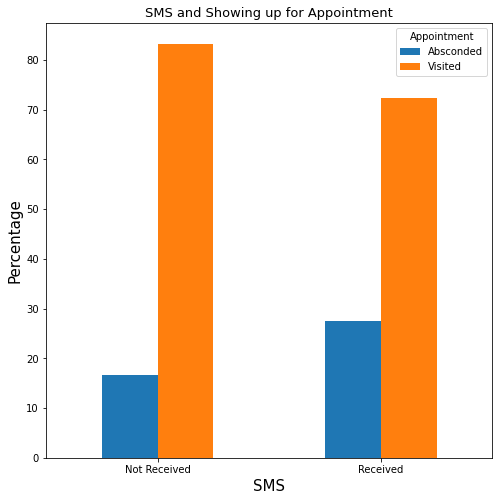

In [113]:
# Bar chart for SMS and showing up for Appointment
PerSMSPts.unstack().plot(kind='bar', figsize=(8,8));

#chart labels
plt.xlabel('SMS', fontsize=15);
plt.ylabel('Percentage', fontsize=15)
plt.title('SMS and Showing up for Appointment', fontsize=13);
location = [0,1]
labels = ['Not Received', 'Received']
plt.xticks(location, labels, rotation=0)

plt.show();

> **SMS Report** Only about 32% of patients received SMS. Over 83% of those who did not receive the SMS showed up for their appointment as compared to 72.4% among those that received the SMS.

<a id='conclusions'></a>
## Conclusions

>**Summary:**
    <ul>
        <li>Most of the patients, 79.8%, showed up for their medical appointments</li>
        <li>Patients above 100 years of age are less likely to show up at the hospital</li>
        <li>Most of the patients are females, 65%. But there is no much difference between the pecerntage that show up per gender, 79.7% for females and 80% for males</li>
        <li>Majority of patients, 95%, whose appointment day was scheduled that same day they were to visit the doctor, showed up for the appointment</li>
        <li>All the hospitals, except for one located at ILHAS OCEÂNICAS DE TRINDADE, have a high patients' show up rate, over 70%</li>
        <li>Only a small percentage of the patients, 9.8%, are enrolled on the  Bolsa Família program, and these patients are less likely to show up for their appointment compared to those not enrolled</li>
        <li>Hypertension is the most common of the three medical condition (about 20%), while alcoholism is the least common (3%). Majority of the patients, about 80%,  with any of the disease condition showed up.</li>
        <li>Though only a small percentage of patients, about 32%, received SMS. It is probably not the best way to remind patients of their scheduled appointment.</li>
    </ul>

> **Limitations:**
    <ul>
         <li>some of the Neighbourhoods have very few data, this makes comparism with others difficult.</li>
         <li>There is no information on why some patients did not receive the SMS, whether it was or not sent by the hospitals.</li>
         <li>Only few diseases were represented in the data.</li>
         <li>No information as to why patients do not enroll on the financial aid (Bolsa Família program), and why those who enrolled are less likely to show up.</li>
    </ul>

> **Recommedations:**
    <ul>
        <li>Hospitals Should be impoved to the stage where they can attend to patients the same day they schedule the appointment, as patients are more likely to show up this period.</li>
        <li>Home care should be organized for those above 100 years, as the are less likely to visit the hospital.</li>
        <li>The financial aid program (Bolsa Família) should be evaluated, because it might not be contributing to the betterment of health status of the good people of Brazil.</li>
        <li>Other methods of communication like phone calls, should be exlored instead of SMS</li>
    </ul>